In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
from keras.callbacks import TensorBoard
warnings.filterwarnings('ignore')
import datetime
import holidays
import networkx as nx



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
tdf=pd.read_csv("/content/drive/My Drive/Colab Notebooks/OR_610_Project/globalterrorismdb_0617dist.csv", encoding='ISO-8859-1')
tdf.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
tdf.fillna({'Killed': tdf['Killed'].median(), 'Wounded': tdf['Wounded'].median()}, inplace=True)
tdf['casualties']= tdf['Killed']+ tdf['Wounded']
tdf['Weapon_type'] = tdf['Weapon_type'].replace({'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)': 'Vehicle'})

tdf.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualties
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0


In [5]:
tdf['Year'] = tdf['Year'].astype(str)
tdf['Month'] = tdf['Month'].astype(str)
tdf['Day'] = tdf['Day'].astype(str)

In [6]:
tdf['Month'] = tdf['Month'].str.pad(width=2, fillchar='0')
tdf['Day'] = tdf['Day'].str.pad(width=2, fillchar='0')
tdf['Month'] = tdf['Month'].replace({'00':'01'})
tdf['Day'] = tdf['Day'].replace({'00':'01'})
tdf['Date'] = tdf[['Year', 'Month', 'Day']].apply(lambda x: '-'.join(x), axis=1)

tdf = tdf.sort_values(by='Date')
tdf.head(10)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualties,Date
1,197000000002,1970,01,01,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,PGIS,0,1,1,1,NaN,0.0,1970-01-01
2,197001000001,1970,01,01,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0,1970-01-01
3,197001000002,1970,01,01,NaN,0,NaN,78,Greece,8,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0,1970-01-01
4,197001000003,1970,01,01,NaN,0,NaN,101,Japan,4,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0,1970-01-01
5,197001010002,1970,01,01,NaN,0,NaN,217,United States,1,...,"""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,0.0,1970-01-01
10,197001050001,1970,01,01,NaN,0,NaN,217,United States,1,...,NaN,NaN,PGIS,0,0,0,0,NaN,0.0,1970-01-01
8,197001020003,1970,01,02,NaN,0,NaN,217,United States,1,...,"David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN,0.0,1970-01-02
6,197001020001,1970,01,02,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,PGIS,0,0,0,0,NaN,0.0,1970-01-02
7,197001020002,1970,01,02,NaN,0,NaN,217,United States,1,...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,0.0,1970-01-02
9,197001030001,1970,01,03,NaN,0,NaN,217,United States,1,...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN,0.0,1970-01-03


In [7]:
country_codes = {
    'Mexico': 'MX',
    'Philippines': 'PH',
    'Greece': 'GR',
    'Japan': 'JP',
    'United States': 'US',
    'Uruguay': 'UY',
    'Italy': 'IT',
    'East Germany (GDR)': 'DE',  # Unified Germany now
    'Ethiopia': 'ET',
    'Guatemala': 'GT',
    'Venezuela': 'VE',
    'West Germany (FRG)': 'DE',  # Unified Germany now
    'Switzerland': 'CH',
    'Jordan': 'JO',
    'Spain': 'ES',
    'Brazil': 'BR',
    'Egypt': 'EG',
    'Argentina': 'AR',
    'Dominican Republic': 'DO',
    'Lebanon': 'LB',
    'Ireland': 'IE',
    'Turkey': 'TR',
    'Paraguay': 'PY',
    'Iran': 'IR',
    'United Kingdom': 'GB',
    'Colombia': 'CO',
    'Bolivia': 'BO',
    'Nicaragua': 'NI',
    'Netherlands': 'NL',
    'Belgium': 'BE',
    'Israel': 'IL',
    'Canada': 'CA',
    'Australia': 'AU',
    'Pakistan': 'PK',
    'Zambia': 'ZM',
    'Sweden': 'SE',
    'Costa Rica': 'CR',
    'South Yemen': 'YE',  # Considered part of Yemen now
    'Cambodia': 'KH',
    'Taiwan': 'TW',
    'Kuwait': 'KW',
    'West Bank and Gaza Strip': 'PS',  # Use Palestine
    'Austria': 'AT',
    'Czechoslovakia': 'CZ',  # Use Czech Republic, assuming most data pertains post-Velvet Divorce
    'India': 'IN',
    'Panama': 'PA',
    'France': 'FR',
    'South Vietnam': 'VN',  # Unified Vietnam now
    'Algeria': 'DZ',
    'El Salvador': 'SV',
    'Thailand': 'TH',
    'Haiti': 'HT',
    'Sudan': 'SD',
    'Morocco': 'MA',
    'Cyprus': 'CY',
    'Myanmar': 'MM',
    'Afghanistan': 'AF',
    'Peru': 'PE',
    'Chile': 'CL',
    'Honduras': 'HN',
    'Yugoslavia': 'RS',  # Use Serbia as the primary successor state
    'Ecuador': 'EC',
    'New Zealand': 'NZ',
    'Zaire': 'CD',  # Now Democratic Republic of the Congo
    'Portugal': 'PT',
    'Malaysia': 'MY',
    'Singapore': 'SG',
    'Botswana': 'BW',
    'Jamaica': 'JM',
    'Chad': 'TD',
    'North Yemen': 'YE',  # Unified Yemen now
    'Andorra': 'AD',
    'Syria': 'SY',
    'South Korea': 'KR',
    'United Arab Emirates': 'AE',
    'South Africa': 'ZA',
    'Kenya': 'KE',
    'Iraq': 'IQ',
    'Somalia': 'SO',
    'Tanzania': 'TZ',
    'Sri Lanka': 'LK',
    'Namibia': 'NA',
    'Bahamas': 'BS',
    'Barbados': 'BB',
    'Trinidad and Tobago': 'TT',
    'Bangladesh': 'BD',
    "People's Republic of the Congo": 'CG',  # Now Republic of the Congo
    'Angola': 'AO',
    'Mauritania': 'MR',
    'Saudi Arabia': 'SA',
    'Djibouti': 'DJ',
    'Indonesia': 'ID',
    'Malta': 'MT',
    'Rhodesia': 'ZW',  # Now Zimbabwe
    'Soviet Union': 'RU',  # Use Russia for most cases
    'Denmark': 'DK',
    'Western Sahara': 'EH',
    'Guyana': 'GY',
    'Mozambique': 'MZ',
    'Tunisia': 'TN',
    'Uganda': 'UG',
    'Norway': 'NO',
    'Poland': 'PL',
    'Lesotho': 'LS',
    'Gabon': 'GA',
    'Libya': 'LY',
    'Bahrain': 'BH',
    'Nigeria': 'NG',
    'Hong Kong': 'HK',
    'Senegal': 'SN',
    'Zimbabwe': 'ZW',
    'Guinea': 'GN',
    'Grenada': 'GD',
    'New Hebrides': 'VU',  # Now Vanuatu
    'Belize': 'BZ',
    'Guadeloupe': 'GP',  # Overseas region of France
    'Martinique': 'MQ',  # Overseas region of France
    'Vatican City': 'VA',
    'Albania': 'AL',
    'Central African Republic': 'CF',
    'Seychelles': 'SC',
    'Dominica': 'DM',
    'Qatar': 'QA',
    'Bulgaria': 'BG',
    'Suriname': 'SR',
    'Swaziland': 'SZ',  # Now Eswatini
    'Luxembourg': 'LU',
    'Iceland': 'IS',
    'French Guiana': 'GF',  # Overseas region of France
    'Falkland Islands': 'FK',  # UK Overseas Territory
    'Burkina Faso': 'BF',
    'New Caledonia': 'NC',  # Special collectivity of France
    'Romania': 'RO',
    'Niger': 'NE',
    'Nepal': 'NP',
    'Togo': 'TG',
    'Finland': 'FI',
    'Fiji': 'FJ',
    'Ghana': 'GH',
    'Mauritius': 'MU',
    'Hungary': 'HU',
    'Laos': 'LA',
    'Papua New Guinea': 'PG',
    'China': 'CN',
    'Liberia': 'LR',
    'Republic of the Congo': 'CG',
    'Mali': 'ML',
    'Germany': 'DE',
    'Yemen': 'YE',
    'Rwanda': 'RW',
    'Sierra Leone': 'SL',
    'Cameroon': 'CM',
    'Cuba': 'CU',
    'Croatia': 'HR',
    'Georgia': 'GE',
    'Azerbaijan': 'AZ',
    'Madagascar': 'MG',
    'Lithuania': 'LT',
    'Burundi': 'BI',
    'Ukraine': 'UA',
    'Moldova': 'MD',
    'Armenia': 'AM',
    'Russia': 'RU',
    'Ivory Coast': 'CI',  # Côte d'Ivoire
    'Kazakhstan': 'KZ',
    'Antigua and Barbuda': 'AG',
    'Bosnia-Herzegovina': 'BA',
    'Tajikistan': 'TJ',
    'Equatorial Guinea': 'GQ',
    'Malawi': 'MW',
    'Uzbekistan': 'UZ',
    'Latvia': 'LV',
    'Brunei': 'BN',
    'Estonia': 'EE',
    'Vietnam': 'VN',
    'Comoros': 'KM',
    'Benin': 'BJ',
    'Slovak Republic': 'SK',  # Slovakia
    'Macedonia': 'MK',  # Now North Macedonia
    'Wallis and Futuna': 'WF',  # French overseas collectivity
    'Belarus': 'BY',
    'Czech Republic': 'CZ',
    'Slovenia': 'SI',
    'Gambia': 'GM',
    'North Korea': 'KP',
    'Eritrea': 'ER',
    'St. Kitts and Nevis': 'KN',
    'French Polynesia': 'PF',  # Overseas collectivity of France
    'Macau': 'MO',  # Special Administrative Region of China
    'Kyrgyzstan': 'KG',
    'Vanuatu': 'VU',
    'Democratic Republic of the Congo': 'CD',
    'Solomon Islands': 'SB',
    'Kosovo': 'XK',
    'East Timor': 'TL',  # Timor-Leste
    'St. Lucia': 'LC',
    'Guinea-Bissau': 'GW',
    'Montenegro': 'ME',
    'International': None,  # No applicable country code
    'Turkmenistan': 'TM',
    'Serbia-Montenegro': 'RS',  # Use Serbia
    'Maldives': 'MV',
    'Bhutan': 'BT',
    'Serbia': 'RS',
    'South Sudan': 'SS'
}


In [8]:

tdf['CountryCode'] = tdf['Country'].map(country_codes)

def get_holidays(country_code):
    if pd.isna(country_code):
        return {}
    try:
        return holidays.CountryHoliday(country_code)
    except NotImplementedError:
        return {}

tdf['HolidayObject'] = tdf['CountryCode'].apply(get_holidays)
tdf['IsHoliday'] = tdf.apply(lambda row: 1 if row['Date'] in row['HolidayObject'] else 0, axis=1)


In [9]:
relevant_columns = [
    'Year', 'Month', 'Day', 'Date',
    'Country', 'CountryCode','Region', 'city', 'latitude', 'longitude',
    'AttackType',
    'Target_type',
    'Group',
    'Killed', 'Wounded',
    'Weapon_type', 'casualties', 'IsHoliday', 'suicide', 'claimed', 'success'
]

tdf = tdf[relevant_columns]
tdf['Date'] = pd.to_datetime(tdf['Date'])
tdf['DaysSinceLatt'] = tdf.groupby('Region')['Date'].diff().dt.days.fillna(0)
tdf['city'].fillna('Unknown', inplace=True)
tdf['Target_type'].fillna('Other', inplace=True)

tdf.head(10)

,Year,Month,Day,Date,Country,CountryCode,Region,city,latitude,longitude,...,Group,Killed,Wounded,Weapon_type,casualties,IsHoliday,suicide,claimed,success,DaysSinceLatt
1,1970,01,01,1970-01-01,Mexico,MX,North America,Mexico city,19.432608,-99.133207,...,23rd of September Communist League,0.0,0.0,Unknown,0.0,1,0,NaN,1,0.0
2,1970,01,01,1970-01-01,Philippines,PH,Southeast Asia,Unknown,15.478598,120.599741,...,Unknown,1.0,0.0,Unknown,1.0,1,0,NaN,1,0.0
3,1970,01,01,1970-01-01,Greece,GR,Western Europe,Athens,37.983773,23.728157,...,Unknown,0.0,0.0,Explosives/Bombs/Dynamite,0.0,1,0,NaN,1,0.0
4,1970,01,01,1970-01-01,Japan,JP,East Asia,Fukouka,33.580412,130.396361,...,Unknown,0.0,0.0,Incendiary,0.0,1,0,NaN,1,0.0
5,1970,01,01,1970-01-01,United States,US,North America,Cairo,37.005105,-89.176269,...,Black Nationalists,0.0,0.0,Firearms,0.0,1,0,0.0,1,0.0
10,1970,01,01,1970-01-01,United States,US,North America,Baraboo,43.468500,-89.744299,...,"Weather Underground, Weathermen",0.0,0.0,Explosives/Bombs/Dynamite,0.0,1,0,NaN,0,0.0
8,1970,01,02,1970-01-02,United States,US,North America,Madison,43.076592,-89.412488,...,New Year's Gang,0.0,0.0,Incendiary,0.0,0,0,1.0,1,1.0
6,1970,01,02,1970-01-02,Uruguay,UY,South America,Montevideo,-34.891151,-56.187214,...,Tupamaros (Uruguay),0.0,0.0,Firearms,0.0,0,0,NaN,0,0.0
7,1970,01,02,1970-01-02,United States,US,North America,Oakland,37.805065,-122.273024,...,Unknown,0.0,0.0,Explosives/Bombs/Dynamite,0.0,0,0,0.0,1,0.0
9,1970,01,03,1970-01-03,United States,US,North America,Madison,43.072950,-89.386694,...,New Year's Gang,0.0,0.0,Incendiary,0.0,0,0,0.0,1,1.0


In [10]:
# # Mode imputation for 'latitude' and 'longitude'
# latitude_mode = tdf['latitude'].mode().iloc[0]
# longitude_mode = tdf['longitude'].mode().iloc[0]

# tdf['latitude'].fillna(latitude_mode, inplace=True)
# tdf['longitude'].fillna(longitude_mode, inplace=True)

tdf = tdf.dropna(subset=['latitude', 'longitude'])

tdf['claimed'].fillna(0, inplace=True)


In [11]:
tdf.isnull().sum()

Year             0
Month            0
Day              0
Date             0
Country          0
CountryCode      1
Region           0
city             0
latitude         0
longitude        0
AttackType       0
Target_type      0
Group            0
Killed           0
Wounded          0
Weapon_type      0
casualties       0
IsHoliday        0
suicide          0
claimed          0
success          0
DaysSinceLatt    0
dtype: int64

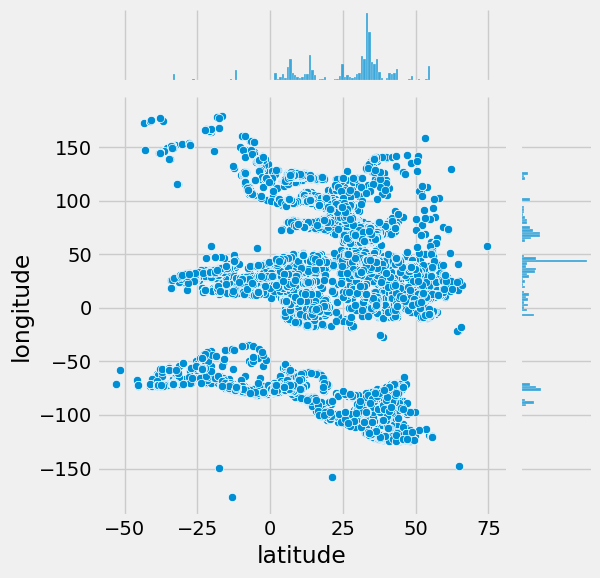

In [12]:
import matplotlib.pyplot as plt
sns.jointplot(data=tdf, x="latitude", y="longitude")
plt.show()


In [13]:
G = nx.Graph()

tdf['Date'] = pd.to_datetime(tdf['Date']).dt.strftime('%Y-%m-%d')

date_nodes = tdf['Date'].unique()
G.add_nodes_from(date_nodes, node_type='Date')



In [14]:
location_tdf = tdf[['Country', 'Region', 'city']].drop_duplicates()
location_nodes = [(row['Country'], row['Region'], row['city']) for index, row in location_tdf.iterrows()]
G.add_nodes_from(location_nodes, node_type='Location')



In [15]:
attack_type_nodes = tdf['AttackType'].unique()
G.add_nodes_from(attack_type_nodes, node_type='AttackType')


In [16]:
for index, row in tdf.iterrows():
    date_node = row['Date']
    location_node = (row['Country'], row['Region'], row['city'])
    G.add_edge(date_node, location_node, date=row['Date'])

    attack_type_node = row['AttackType']
    G.add_edge(location_node, attack_type_node, attack_details={
        'killed': row['Killed'],
        'wounded': row['Wounded'],
        'total_casualties': row['casualties'],
        'weapon_type': row['Weapon_type']
    })


In [17]:
print('Number of Nodes:', G.number_of_nodes())
print('Number of Edges:', G.number_of_edges())

print('Degree for a specific Date Node:', G.degree('2001-09-11'))

Number of Nodes: 49112
Number of Edges: 183367
Degree for a specific Date Node: 7


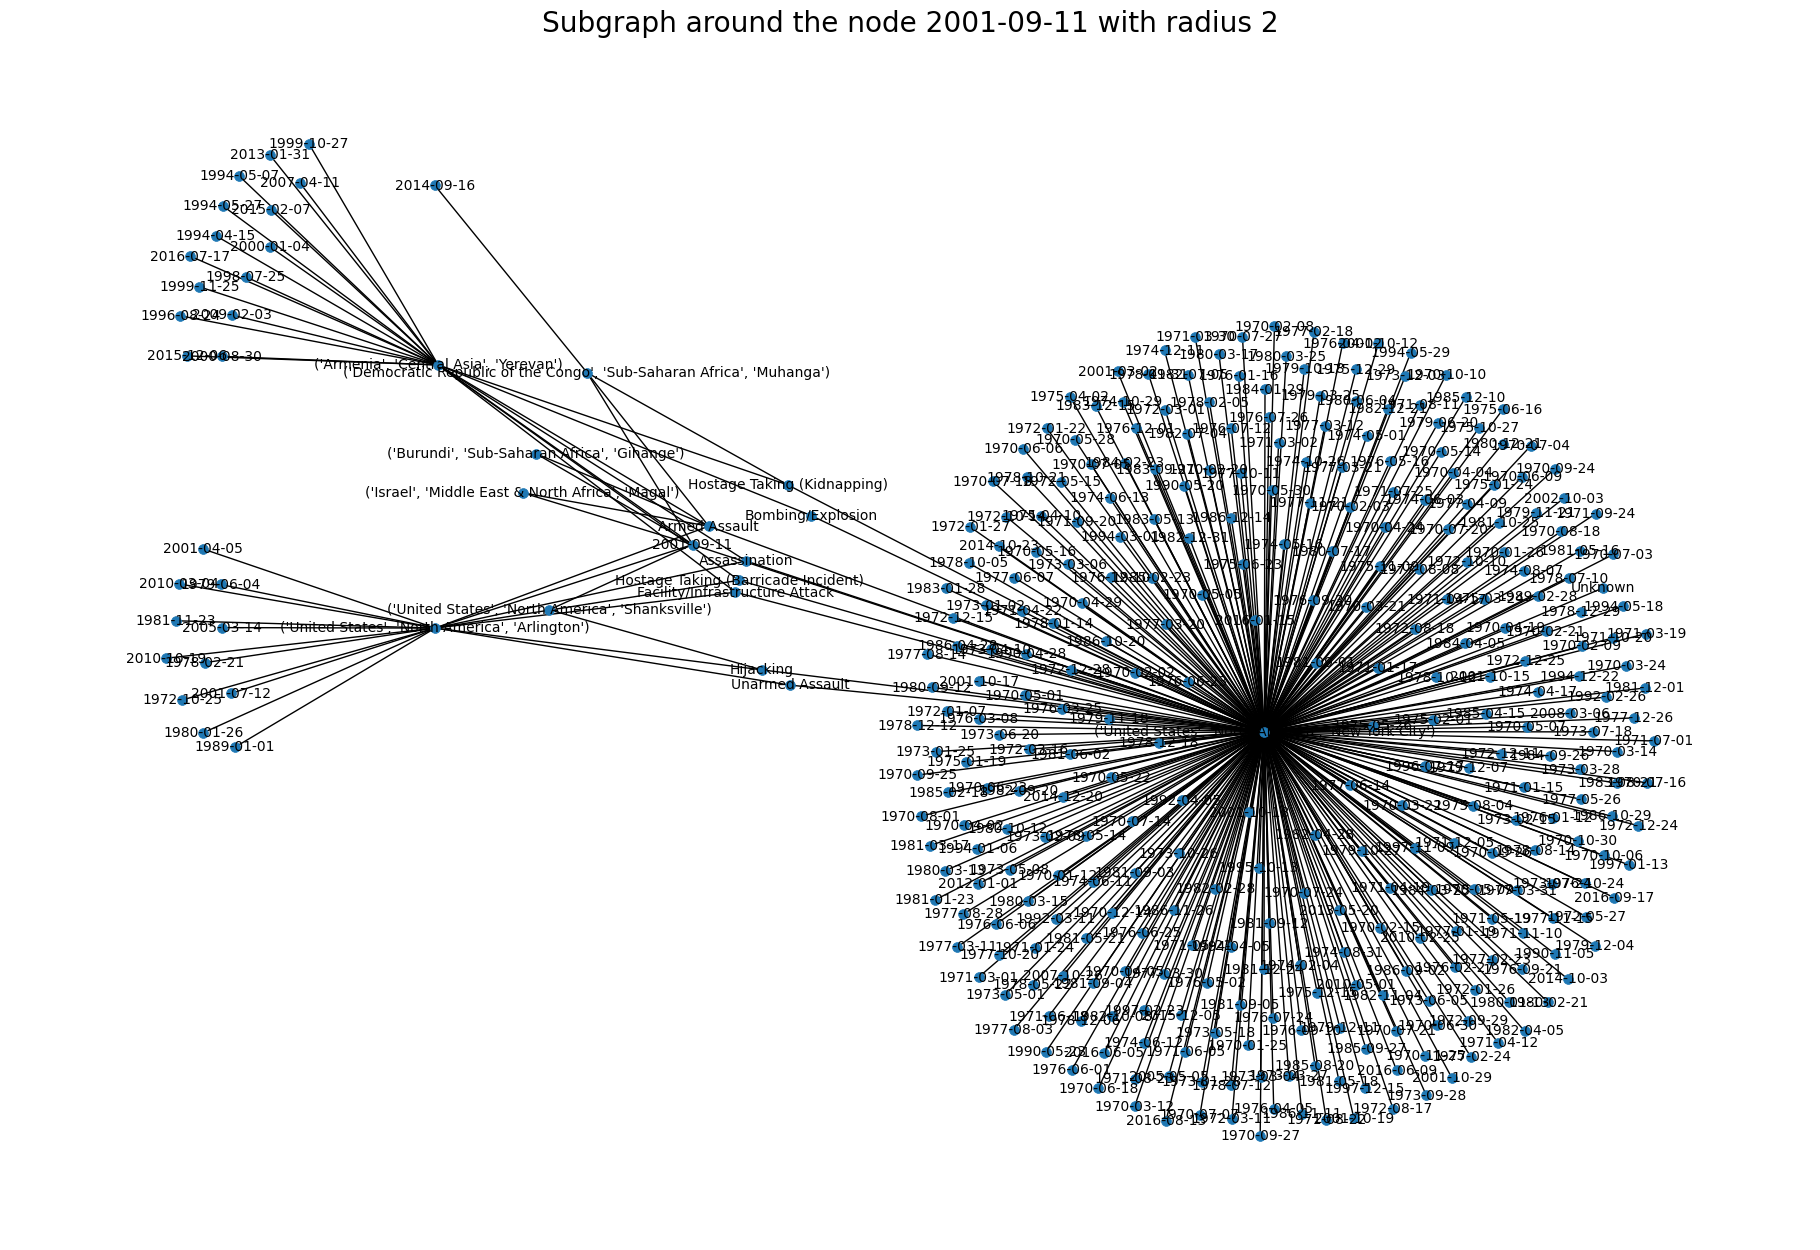

In [18]:

def draw_subgraph(G, node, radius=1):
    ego_graph = nx.ego_graph(G, node, radius=radius)
    pos = nx.spring_layout(ego_graph, seed=42)
    plt.figure(figsize=(18, 12))
    nx.draw(ego_graph, pos, node_size=50, with_labels=True, font_size=10)
    plt.title(f'Subgraph around the node {node} with radius {radius}')
    plt.show()


draw_subgraph(G, '2001-09-11', radius=2)


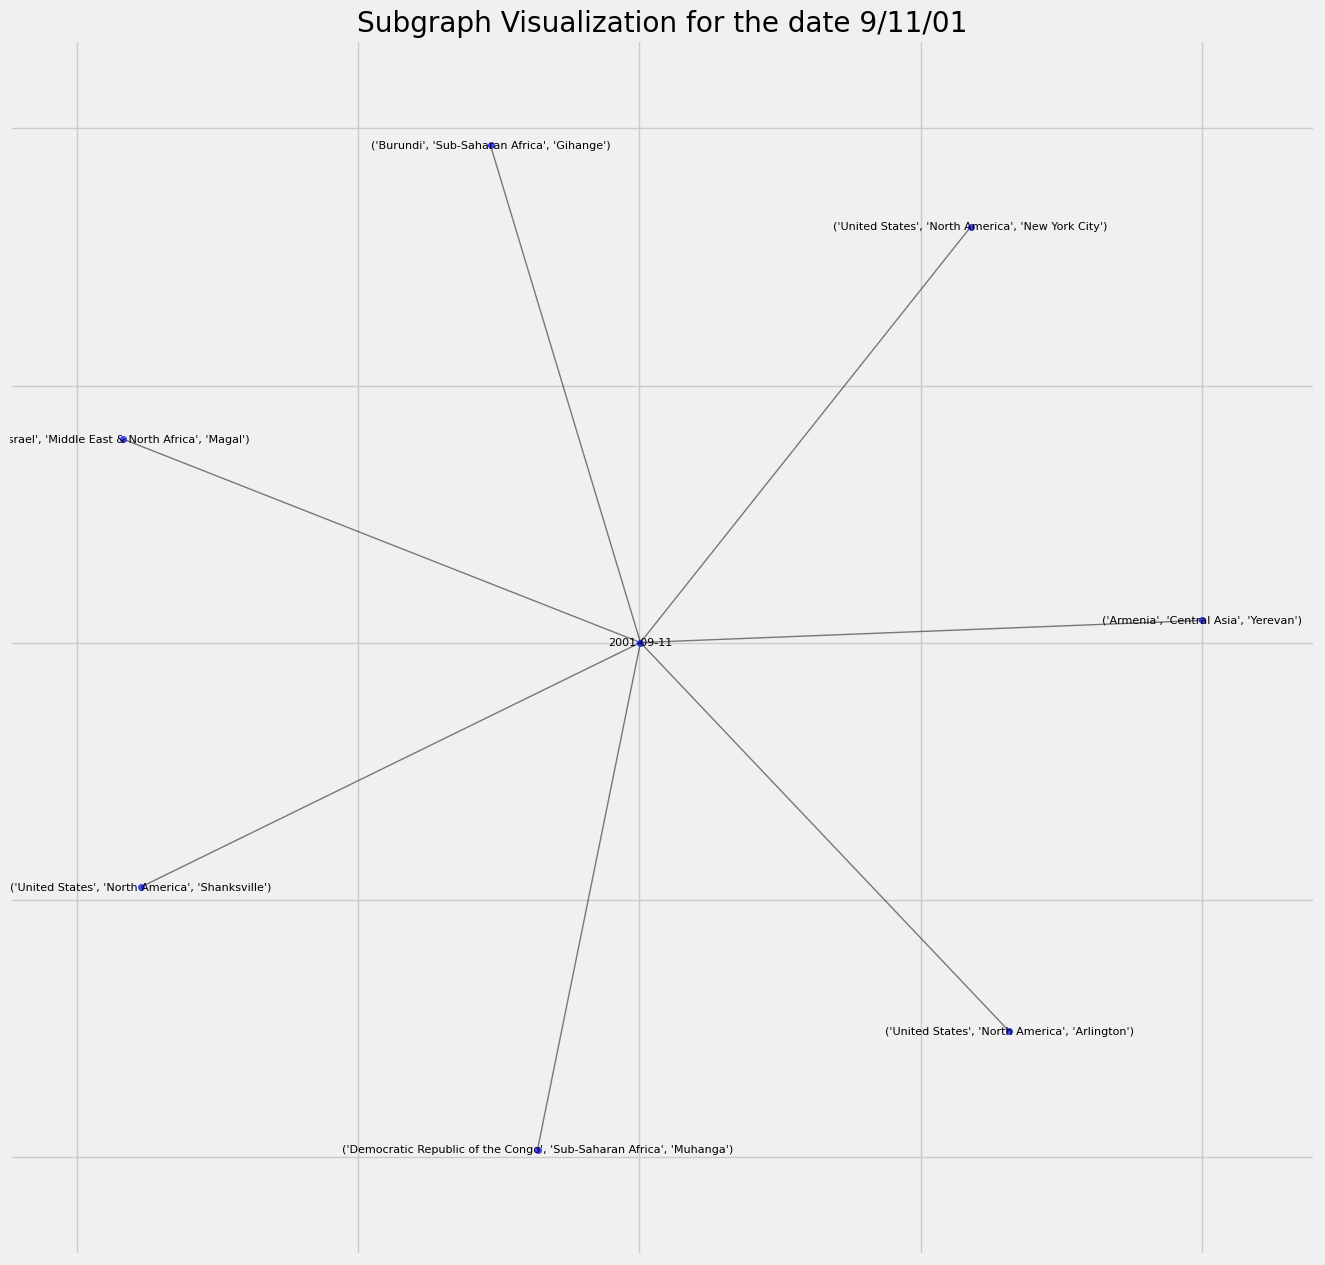

In [19]:

date_of_interest = '2001-09-11'
if date_of_interest in G.nodes:
    subgraph_nodes = list(nx.ego_graph(G, date_of_interest, radius=1).nodes)
    subgraph_edges = list(nx.ego_graph(G, date_of_interest, radius=1).edges)

    sub_G = G.subgraph(subgraph_nodes)

    pos = nx.spring_layout(sub_G, seed=42)

    plt.figure(figsize=(15, 15))
    nx.draw_networkx_nodes(sub_G, pos, node_size=20, node_color='blue', alpha=0.7)
    nx.draw_networkx_edges(sub_G, pos, edgelist=subgraph_edges, alpha=0.5)
    nx.draw_networkx_labels(sub_G, pos, font_size=8, font_color='black')

    plt.title('Subgraph Visualization for the date 9/11/01')
    plt.show()
else:
    print(f"The date {date_of_interest} is not in the graph. Please provide the correct date format.")



In [20]:
tdf.columns

Index(['Year', 'Month', 'Day', 'Date', 'Country', 'CountryCode', 'Region',
       'city', 'latitude', 'longitude', 'AttackType', 'Target_type', 'Group',
       'Killed', 'Wounded', 'Weapon_type', 'casualties', 'IsHoliday',
       'suicide', 'claimed', 'success', 'DaysSinceLatt'],
      dtype='object')

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = tdf[['AttackType', 'Target_type', 'Weapon_type', 'Country']]

encoder = OneHotEncoder(sparse=False)
encoder.fit(categorical_features)

one_hot_encoded_features = encoder.transform(categorical_features)


In [22]:
numerical_features = tdf[['latitude', 'longitude', 'Killed', 'Wounded']]

scaler = StandardScaler()
scaler.fit(numerical_features)
normalized_numerical_features = scaler.transform(numerical_features)

binary_features = tdf[['IsHoliday', 'claimed', 'suicide', 'success']].values


In [23]:
from gensim.models import Word2Vec
city_names = [[city] for city in tdf['city'].astype(str).tolist()]
city_model = Word2Vec(sentences=city_names, vector_size=100, window=5, min_count=1, workers=4)
city_vectors = {city[0]: city_model.wv[city[0]] for city in city_names if city[0] in city_model.wv}
city_feature_vectors = np.array([city_vectors.get(city, np.zeros(100)) for city in tdf['city'].astype(str)])


In [24]:
node_features = np.concatenate((one_hot_encoded_features, normalized_numerical_features, binary_features, city_feature_vectors), axis=1)



In [25]:
node_features

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.22673286e-03, -9.85346548e-03,  7.44519010e-03],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -7.04156049e-03,  9.01455875e-04,  6.39253389e-03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -5.48125012e-03,  3.81427887e-03, -8.11302103e-03],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.33460207e-03, -1.45656825e-03,  1.73636433e-03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -9.92070884e-03,  7.00561749e-03, -7.38598825e-03],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         4.21927823e-03,  1.37419102e-03,  8.32488388e-03]])

In [26]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.3 MB/s eta 0:00:00


In [27]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F



In [28]:
node_features = torch.tensor(node_features, dtype=torch.float)
num_classes = tdf['AttackType'].nunique()

In [29]:
node_to_idx = {node: i for i, node in enumerate(G.nodes())}
edge_list = [(node_to_idx[src], node_to_idx[dest]) for src, dest in G.edges()]
edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()


In [30]:
label_encoder = LabelEncoder()
target_labels = label_encoder.fit_transform(tdf['AttackType'])

labels = torch.tensor(target_labels, dtype=torch.long)

In [31]:
num_nodes = len(labels)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_indices = np.random.choice(num_nodes, size=int(0.8 * num_nodes), replace=False)
train_mask[train_indices] = True
test_mask[~train_mask] = True

In [32]:
data = Data(x=node_features, edge_index=edge_index, y=labels, train_mask=train_mask, test_mask=test_mask)


In [33]:
print("NaN in node_features:", torch.isnan(node_features).any())
print("Inf in node_features:", torch.isinf(node_features).any())


NaN in node_features: tensor(False)
Inf in node_features: tensor(False)


In [60]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

model = GCN(input_dim=data.num_node_features, hidden_dim=16, output_dim=num_classes)

loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
accuracies = []

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = loss_func(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        model.eval()
        _, pred = model(data.x, data.edge_index).max(dim=1)
        correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
        acc = correct / int(data.test_mask.sum())
        accuracies.append(acc)
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {acc}')




Epoch 0, Loss: 2.1525542736053467, Accuracy: 0.5117499773748831
Epoch 10, Loss: 1.1936137676239014, Accuracy: 0.6607740806660835
Epoch 20, Loss: 0.8153296113014221, Accuracy: 0.8007783040212374
Epoch 30, Loss: 0.6536105871200562, Accuracy: 0.8363449877824368
Epoch 40, Loss: 0.5632283091545105, Accuracy: 0.8469938761350267
Epoch 50, Loss: 0.521482527256012, Accuracy: 0.8490452200669704
Epoch 60, Loss: 0.49565935134887695, Accuracy: 0.8539020784940722
Epoch 70, Loss: 0.4783962070941925, Accuracy: 0.8559534224260159
Epoch 80, Loss: 0.46631020307540894, Accuracy: 0.8582159341156596
Epoch 90, Loss: 0.45751845836639404, Accuracy: 0.8590002715014028
Epoch 100, Loss: 0.45095503330230713, Accuracy: 0.8595432743069172
Epoch 110, Loss: 0.44572097063064575, Accuracy: 0.8594527738393315
Epoch 120, Loss: 0.44150984287261963, Accuracy: 0.8596036079519744
Epoch 130, Loss: 0.4378994107246399, Accuracy: 0.8595734411294458
Epoch 140, Loss: 0.43475815653800964, Accuracy: 0.859422607016803
Epoch 150, Loss:

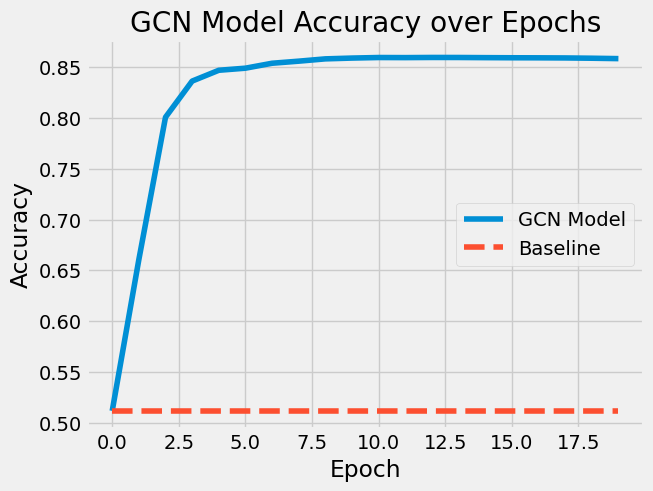

In [66]:
plt.plot(accuracies, label="GCN Model")
plt.plot([accuracies[0]] * len(accuracies), label="Baseline", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("GCN Model Accuracy over Epochs")
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import f1_score, precision_score, recall_score

model.eval()
_, pred = model(data.x, data.edge_index).max(dim=1)
pred = pred[data.test_mask]
true_labels = data.y[data.test_mask]

f1 = f1_score(true_labels, pred, average='weighted')
precision = precision_score(true_labels, pred, average='weighted')
recall = recall_score(true_labels, pred, average='weighted')

print(f'Accuracy: {acc}, F1 Score: {f1}, Precision: {precision}, Recall: {recall}')

Accuracy: 0.8584572686958882, F1 Score: 0.8576088886309887, Precision: 0.8574997112724803, Recall: 0.8582762677607167


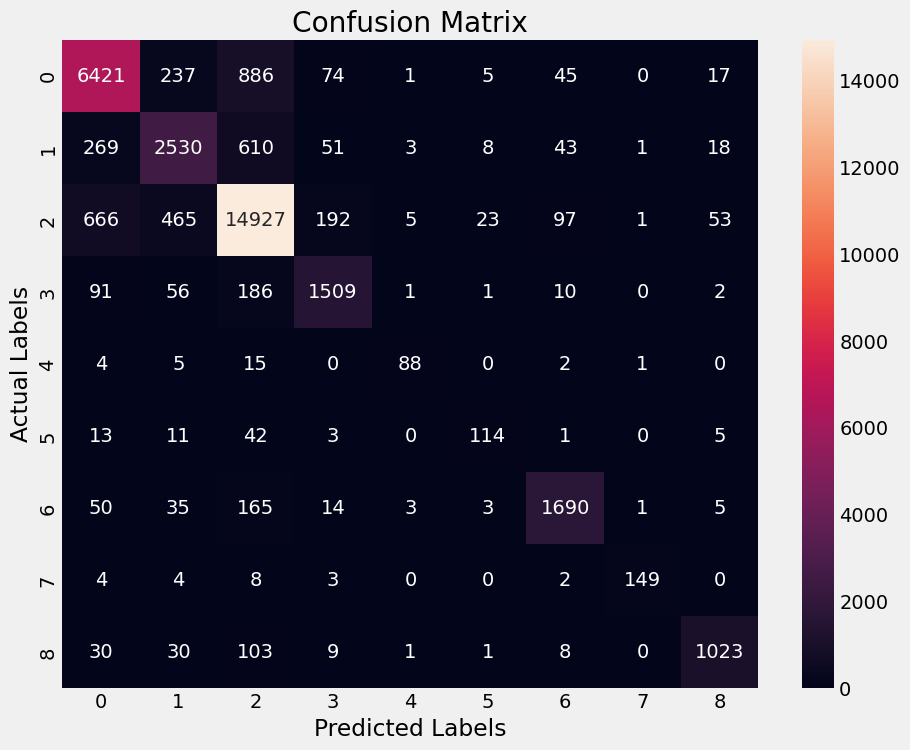

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7686
           1       0.75      0.72      0.73      3533
           2       0.88      0.91      0.89     16429
           3       0.81      0.81      0.81      1856
           4       0.86      0.77      0.81       115
           5       0.74      0.60      0.66       189
           6       0.89      0.86      0.87      1966
           7       0.97      0.88      0.92       170
           8       0.91      0.85      0.88      1205

    accuracy                           0.86     33149
   macro avg       0.85      0.80      0.83     33149
weighted avg       0.86      0.86      0.86     33149



In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions and true labels
# pred = pred[data.test_mask].cpu().numpy()
# true_labels = data.y[data.test_mask].cpu()

cm = confusion_matrix(true_labels, pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Print out the classification report
print(classification_report(true_labels, pred))

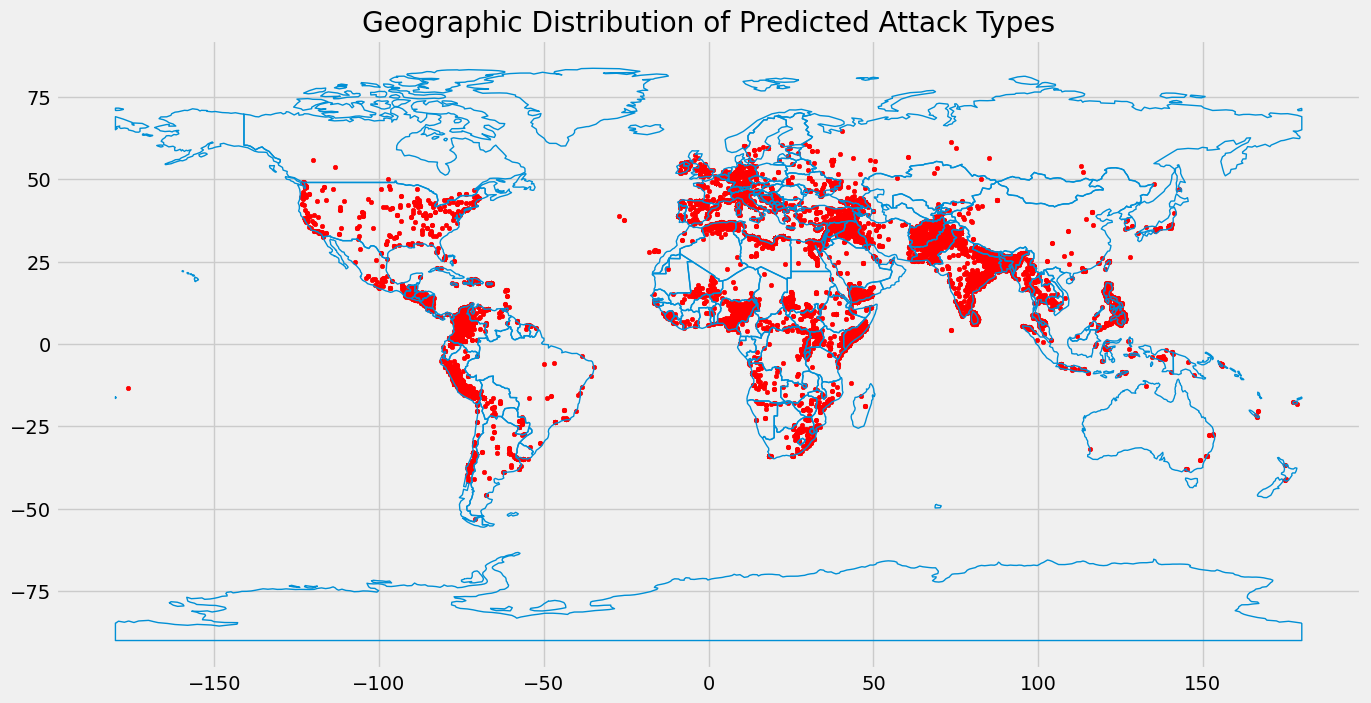

In [69]:
import geopandas as gpd
from shapely.geometry import Point

test_indices = [i for i in range(len(tdf)) if test_mask[i]]

original_data_with_preds = tdf.iloc[test_indices].copy()
original_data_with_preds['predicted_label'] = label_encoder.inverse_transform(pred.numpy())

gdf = gpd.GeoDataFrame(
    original_data_with_preds,
    geometry=gpd.points_from_xy(original_data_with_preds.longitude, original_data_with_preds.latitude)
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, color='red', markersize=10)
plt.title('Geographic Distribution of Predicted Attack Types')
plt.show()


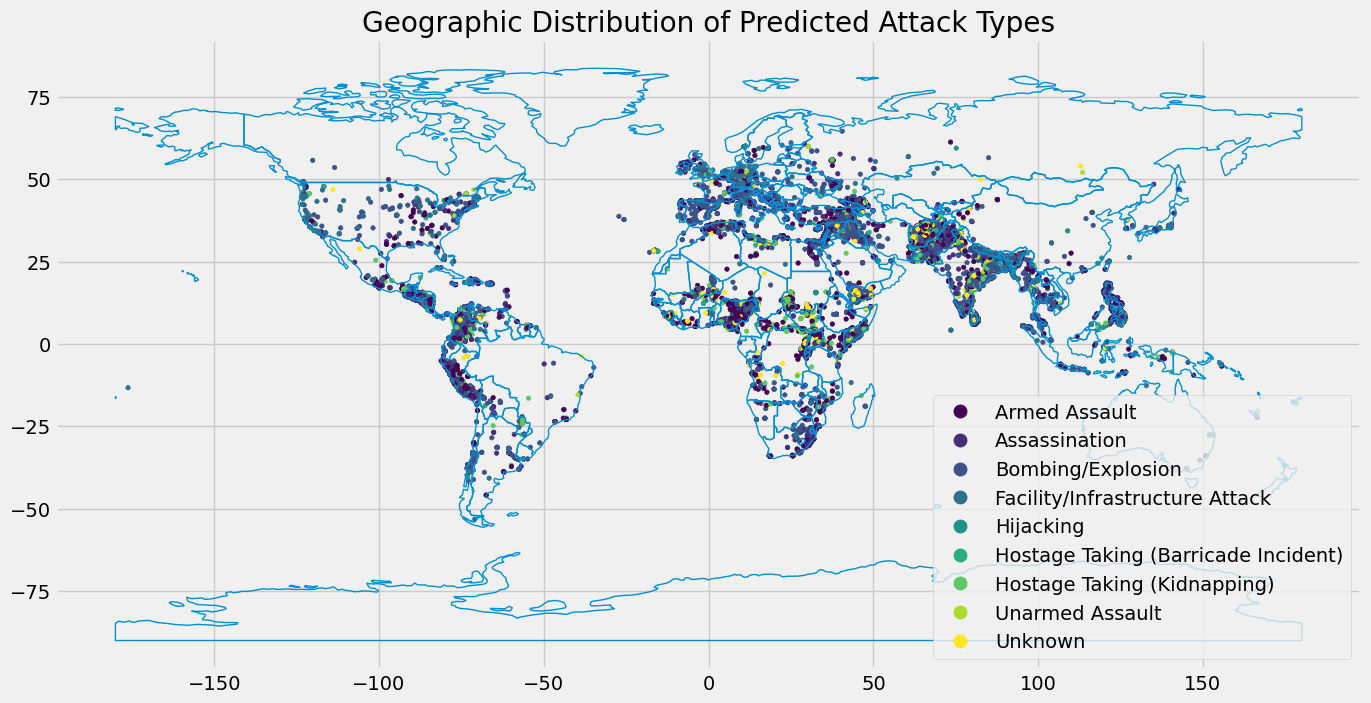

In [70]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

test_indices = [i for i in range(len(tdf)) if test_mask[i]]
original_data_with_preds = tdf.iloc[test_indices].copy()
original_data_with_preds['predicted_label'] = label_encoder.inverse_transform(pred.numpy())

gdf = gpd.GeoDataFrame(
    original_data_with_preds,
    geometry=gpd.points_from_xy(original_data_with_preds.longitude, original_data_with_preds.latitude)
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, column='predicted_label', legend=True, markersize=10, cmap='viridis')

plt.title('Geographic Distribution of Predicted Attack Types')
plt.show()


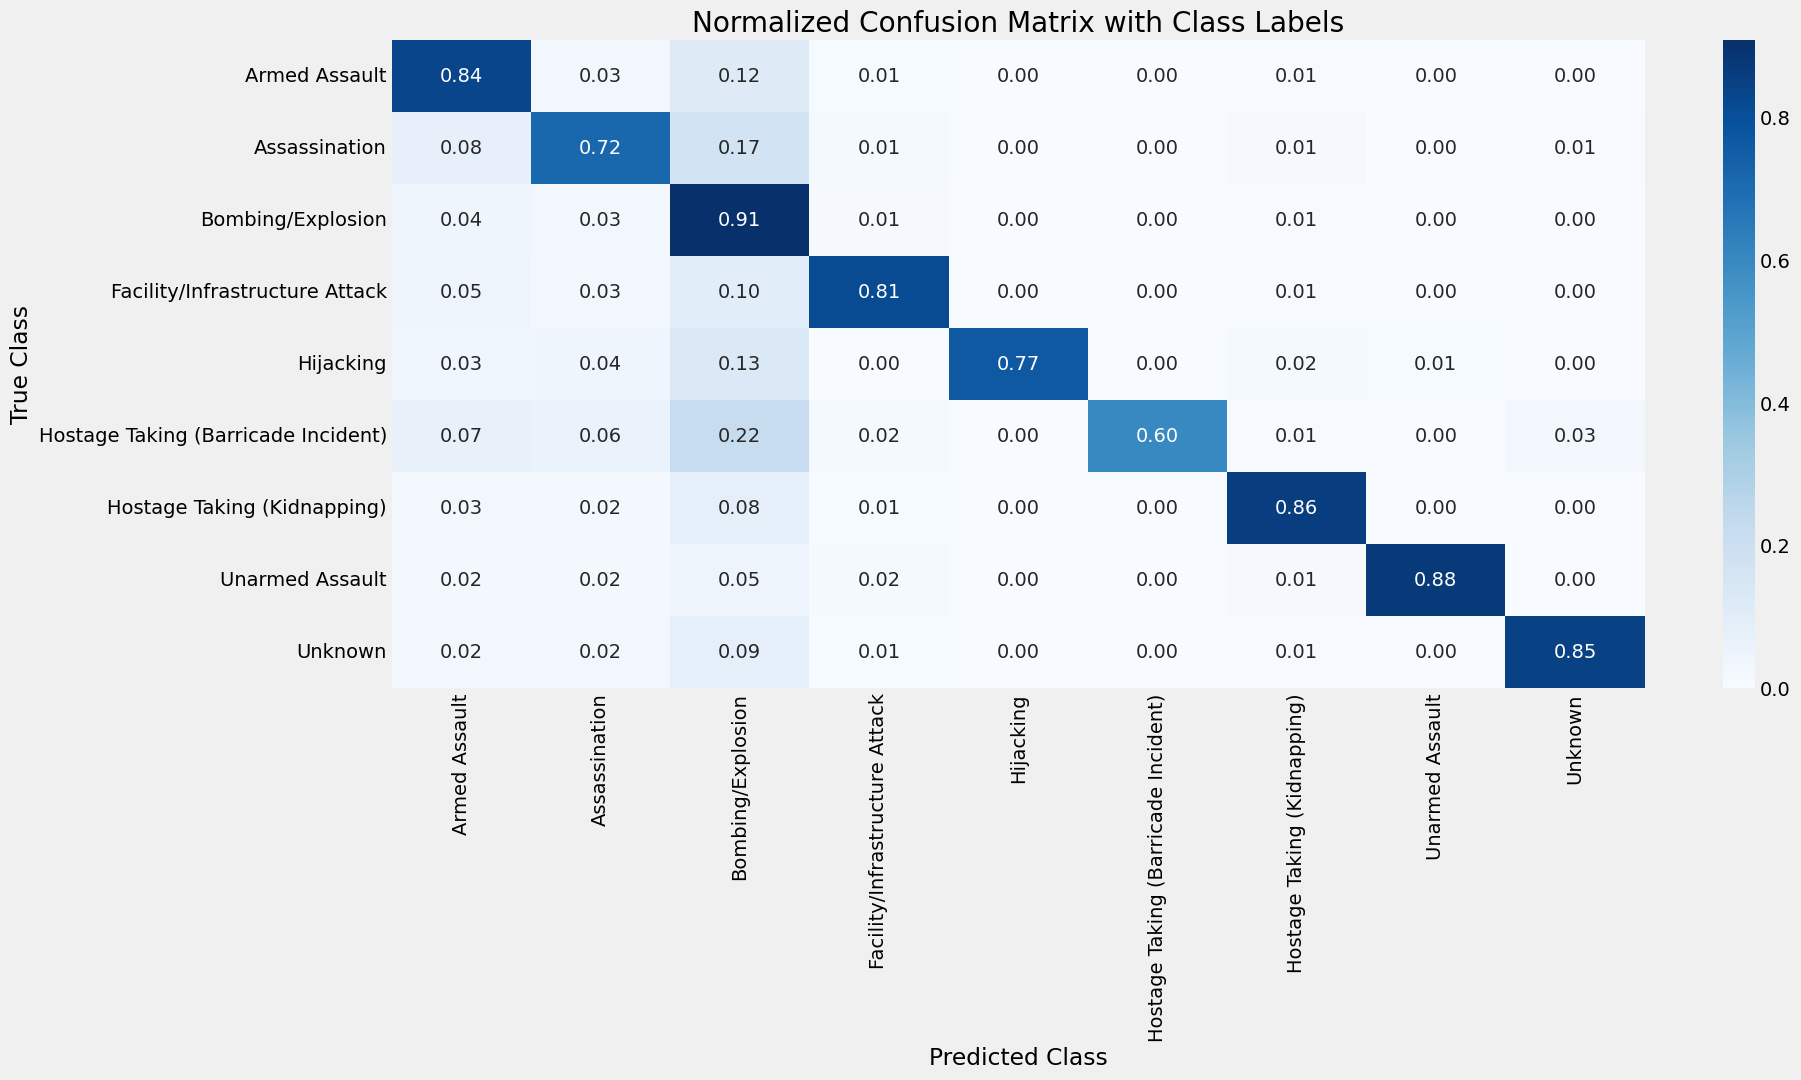

                                     precision    recall  f1-score   support

                      Armed Assault       0.85      0.84      0.84      7686
                      Assassination       0.75      0.72      0.73      3533
                  Bombing/Explosion       0.88      0.91      0.89     16429
     Facility/Infrastructure Attack       0.81      0.81      0.81      1856
                          Hijacking       0.86      0.77      0.81       115
Hostage Taking (Barricade Incident)       0.74      0.60      0.66       189
        Hostage Taking (Kidnapping)       0.89      0.86      0.87      1966
                    Unarmed Assault       0.97      0.88      0.92       170
                            Unknown       0.91      0.85      0.88      1205

                           accuracy                           0.86     33149
                          macro avg       0.85      0.80      0.83     33149
                       weighted avg       0.86      0.86      0.86     331

In [71]:
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(true_labels.cpu().numpy(), pred.cpu().numpy())

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = label_encoder.inverse_transform([i for i in range(num_classes)])

plt.figure(figsize=(18, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Normalized Confusion Matrix with Class Labels')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

print(classification_report(true_labels.cpu().numpy(), pred.cpu().numpy(), target_names=class_names))


In [40]:
# tdf.to_csv('/content/drive/My Drive/Colab Notebooks/OR_610_Project/data.csv', index=False)

In [43]:
degree_centrality = nx.degree_centrality(G)

top_10_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:11]

print("Top 10 most influential nodes:")
for node in top_10_nodes:
    print(f"{node}: {degree_centrality[node]}")

Top 10 most influential nodes:
Bombing/Explosion: 0.30915680804707707
Armed Assault: 0.28962961454663927
Assassination: 0.11934189896357232
Hostage Taking (Kidnapping): 0.09847081101993445
Facility/Infrastructure Attack: 0.08505222862495165
Unknown: 0.06715399808596853
('Iraq', 'Middle East & North Africa', 'Baghdad'): 0.05996619901854982
('United Kingdom', 'Western Europe', 'Belfast'): 0.03286432774734785
('Pakistan', 'South Asia', 'Karachi'): 0.02702042312312924
('Iraq', 'Middle East & North Africa', 'Mosul'): 0.023151636089674413
('Somalia', 'Sub-Saharan Africa', 'Mogadishu'): 0.019710451833601435
